In [33]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from random import sample
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Clustering

We have a given dataset 

$$
    X \in \mathbb{R}^{m \times n},
$$

where $m$ is the number of samples and $n$ is the number of features.

In the dateset we only have features and no targets, what differs from regression and classification problems.

We say that 

$$
    X^{(i)} \in \mathbb{R}^{1 \times n}
$$

is the $i$-th example ($i = 1, \dots, m$) and 

$$
    X_j \in \mathbb{R}^m
$$ 

is the $j$-th feature vector ($j = 1, \dots, n$), such that 

$$
    X^{(i)}_j \in \mathbb{R}  
$$

is the $j$-th feature of the $i$-th example.

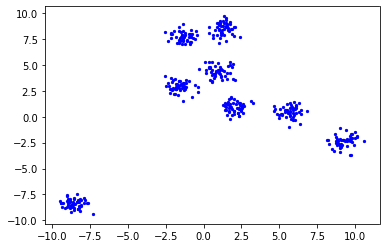

In [34]:
# Set number of samples, features, clusters
m, n, k = 400, 2, 8

# Load example dataset
X, y = make_blobs(n_samples=m, n_features=n, centers=k, cluster_std=0.5,
                  shuffle=True, random_state=0)

# Plot datapoints
plt.scatter(X[:,0], X[:,1], c='b', s=5)
plt.show()

## K-means

### Goal

Assign a cluster $c^{(i)} \in \mathbb{N}$ to every sample $x^{(i)}$.

### Cost function

$$
    J(c, \mu) = \sum_{i=1}^m \| X^{(i)} - \mu_{c^{(i)}} \|,
$$

where $\mu_{c^{(i)}} \in \mathbb{R}^n$ is the the cluster centroid of the cluster $c^{(i)}$.

### Algorithm

1. Randomly initialize $k$ datapoints as cluster centroids $\mu_1, \mu_2, ..., \mu_k \in \mathbb{R}^n$.
2. 


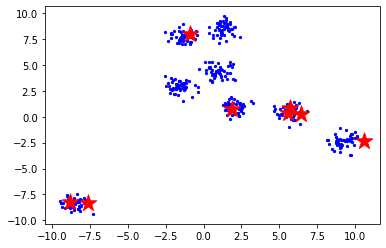

In [35]:
# Randomly choose k datapoints as centroids
centroids = X[sample(range(len(X)), k)]

# Plot datapoints with centroids
plt.scatter(X[:,0], X[:,1], c='b', s=5)
plt.scatter(centroids[:,0], centroids[:,1], s=300, marker='*', c='r')
plt.show()

In [52]:
def kmeans(X, k, n_runs=100, verbose=0):
    """Simple KMeans.
    
    Parameter
    ---------
        X : ndarray of shape (n_samples, 2)
            Features.
        k : int
            Number of neighbors.
        n_runs : int, default=100
            Number of repeated runs.
        verbose : int, default=0
            Prints cost for every run if > 0.
    Return
    ------
        results : dict
            All costs, centroids, clusters and starting centroids.
    """
    
    # Lists to save the runs
    all_costs = []
    all_centroids = []
    all_clusters = []
    all_starting_centroids = []

    # Iterate over all number of runs
    # TODO: Parallelize
    for run in range(n_runs):

        # Choose random starting centroids
        centroids = X[sample(range(len(X)), k)]

        # Save starting centroids
        all_starting_centroids.append(deepcopy(centroids))

        # Initialize old centroids (to compute error)
        centroids_old = np.zeros(centroids.shape)

        # Initialize array to store index of cluster datapoint gets assigned to
        clusters = np.zeros(len(X))

        # Set error > 0 
        error = 1

        # Break if centroids does not change
        while error > 0:

            # Replace nan values with zeros
            centroids[np.isnan(centroids)] = 0

            # Save old centroids for error check
            centroids_old = deepcopy(centroids)

            # Cluster assignment step
            for i, datapoint in enumerate(X):

                # Get euclidean distance of datapoint to all centroids
                distances = np.linalg.norm(datapoint - centroids, axis=1)
                clusters[i] = np.argmin(distances)

            # Centroid movement step
            for i, centroid in enumerate(centroids):
                points = [X[j] for j in range(len(X)) if i == clusters[j]]
                centroids[i] = np.mean(points, axis=0)

            # Compute the error
            error = np.sum(np.linalg.norm(centroids_old - centroids, axis=1))

        # Compute cost
        assigned_centroids = []
        for i, datapoint in enumerate(X):
            assigned_centroids.append([centroids[j] for j in range(
                len(centroids)) if j == clusters[i]][0])
        cost = np.sum( np.linalg.norm(X - assigned_centroids, axis=0) ) / len(X)

        # Print run
        if verbose > 0:
            print('run, cost = ' + str((run + 1, cost)))
            
        # Add to lists
        all_costs.append(cost)
        all_centroids.append(centroids)
        all_clusters.append(clusters)
            
    # Add lists to dict
    results = {
        'costs': all_costs,
        'centroids': all_centroids,
        'clusters': all_clusters,
        'starting_centroids': all_starting_centroids,
    }

    return results

In [53]:
# Run KMeans
kmeans_results = kmeans(X, k, verbose=1)

run, cost = (1, 0.10013474738962644)
run, cost = (2, 0.08286516438581124)
run, cost = (3, 0.07028354569988948)
run, cost = (4, 0.04913769962009759)
run, cost = (5, 0.06685296590139647)
run, cost = (6, 0.04913769962009759)
run, cost = (7, 0.08700199458095113)
run, cost = (8, 0.08309205208536896)
run, cost = (9, 0.06715905000742434)
run, cost = (10, 0.06703320807153144)
run, cost = (11, 0.13054219020433916)
run, cost = (12, 0.04913769962009759)
run, cost = (13, 0.08301003637796843)
run, cost = (14, 0.08322626510457834)
run, cost = (15, 0.06995429132815073)
run, cost = (16, 0.11806384254367469)
run, cost = (17, 0.04913769962009759)
run, cost = (18, 0.04913769962009759)
run, cost = (19, 0.04913769962009759)
run, cost = (20, 0.06665308544245885)
run, cost = (21, 0.09041346767987055)
run, cost = (22, 0.04913769962009759)
run, cost = (23, 0.11830072118494428)
run, cost = (24, 0.07530879599028957)
run, cost = (25, 0.08666301295673741)
run, cost = (26, 0.06708363399912579)
run, cost = (27, 0.07

In [46]:
def plot_clusters_2d(X, y, k, centers=None):
    '''
    Plots up to 8 clustes in different colors.
    
    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        The input samples to assign to the labels.
        
    y : ndarry of shape (n_samples,)
        The integer labels for cluster membership of each sample.
        
    k : int
        The number of clusters.
    
    centers : ndarray of shape (n_clusters, n_features)
        The cluster centers.
    '''
    
    # Set of colors 
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'gray']

    # Iterate over number of clusters
    for i in range(k):
        
        # Plot datapoints in color of related cluster 
        points = np.array([X[j] for j in range(len(X)) if y[j] == i])
        plt.scatter(points[:, 0], points[:, 1], c=colors[i], s=5)
    
        # Plot centroids
        if centers is not None:
            plt.scatter(centers[i, 0], centers[i, 1], s=300, marker='*', c=colors[i])

best run, cost = (3, 0.04913769962009759)


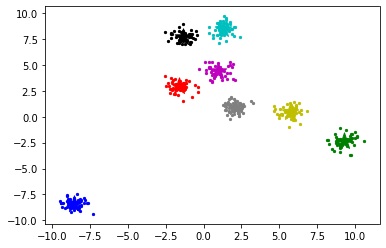

In [57]:
# Compute best run
run = np.argmin(np.array(kmeans_results['costs']))

# Print number of run and costs
print('best run, cost = ' + str((best_run, kmeans_results['costs'][run])))

# Plot clusters and centroids of best run
plot_clusters_2d(X, kmeans_results['clusters'][run], k,
                 kmeans_results['centroids'][run])

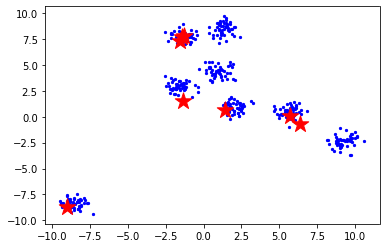

In [58]:
# Plot starting centroids
starting_centroids = kmeans_results['starting_centroids'][run]
plt.scatter(X[:,0], X[:,1], c='b', s=5)
plt.scatter(starting_centroids[:,0], starting_centroids[:,1], s=300,
            marker='*', c='red')

best run, cost = (3, 0.10013474738962644)


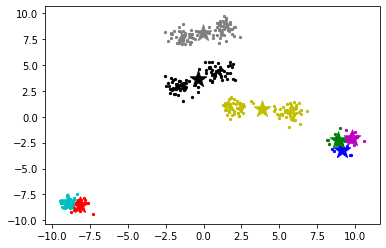

In [59]:
# Choose specific run
run = 0

# Print number of run and costs
print('best run, cost = ' + str((best_run, kmeans_results['costs'][run])))

# Plot clusters and centroids of best run
plot_clusters_2d(X, kmeans_results['clusters'][run], k,
                 kmeans_results['centroids'][run])

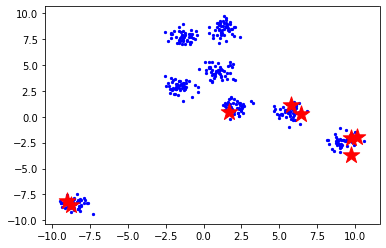

In [60]:
# Plot starting centroids
starting_centroids = kmeans_results['starting_centroids'][run]
plt.scatter(X[:,0], X[:,1], c='b', s=5)
plt.scatter(starting_centroids[:,0], starting_centroids[:,1], s=300,
            marker='*', c='red')

### How to choose k?

In [62]:
# Function to compute distortion
distortion = lambda X, centroids: sum(np.min(
    cdist(X, centroids, 'euclidean'), axis=1)) / X.shape[0]

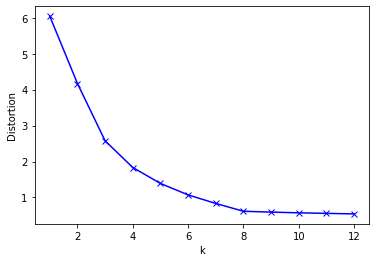

In [67]:
# Get disortion for an increasing number of clusters
K = range(1, 13)
all_distortions = []
for k in K:
    kmeans_results = kmeans(X, k)
    run = np.argmin(np.array(kmeans_results['costs']))
    all_distortions.append(distortion(X, kmeans_results['centroids'][run]))
    
# Plot the elbow for distortion
plt.plot(K, all_distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()